# Project 5. Communicate Data Findings - Prosper Loan Data


# Exploratory Analysis

## Intro and Understanding Data

Since this data is about loan, which I am not familiar with, I will try to understand things first. The type of loan like Prosper is uncommon in my country home, therefore I tried to understand the business first. What I understand about Loan business, lender (in this Prosper case, investors ) aims the profit from the interest amount, where the biggest the interest rate the bigger profit they could get.


In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb 
from pandas.api.types import CategoricalDtype
%matplotlib inline 

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

# load dataset
df = pd.read_csv('prosperLoanData.csv')

In [3]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

# Dataset overview
Dataset has 81 columns and 113937 entries. Default variables types composition : bool(3), float64(50), int64(11), object(17)

### Focus 

Refer to general understanding that I read from [Investopedia](https://www.investopedia.com/ask/answers/100314/what-difference-between-interest-rate-and-annual-percentage-rate-apr.asp), related to the difference between Interest Rate and APR, I decided to focus on the Borrower APR. 

However I am also interested in looking what affect Prosper Rating and what is being affected by Prosper Rating. Since Prosper has their own specific grade and this rating is functioned as guidance to the potential investor. Refer to [Prosper Rating by Prosper](https://www.prosper.com/invest/how-to-invest/prosper-ratings/?mod=article_inline)

Also since Prosper Rating is unique, in addition, I would like to see the effect of the ratings to the outcome of the loan


### Missing data & tidying concern

- I tried to understand the data from Excel and found out that Credit Grade is null when there is Prosper Rating score, and vice versa. So I decided to combined the Prosper Rating (alpha) and the credit Grade. 

- In the Credit Grade there is NC grade, however that NC loan only counts 141 lines, which is  small. And seems this grade is old, loans are from 2006 and 2007. So, I will drop these rows. 

- BorrowerAPR only has 113912 data out of 113937. As per general understanding from investopedia, "The APR should always be greater than or equal to the nominal interest rate, except in the case of a specialized deal where a lender is offering a rebate on a portion of your interest expense" , for the missing value I will put BorrowerAPR equal to Borrower Rate. 


### Variables to analyze : 

After looking at the variables and get understanding about Prosper loan, specifically Borrower APR, I decided to list all the variables that may seem to be useful for further presentation & analysis (not all will be used) : 
- Numerical Variables : BorrowerAPR, BorrowerRate, EffectiveYield, ProsperRating (both), ProsperScore, LoanOriginalAmount, StatedMonthlyIncome, DebtToIncomeRatio, LenderYield, Investors, CreditGrade, Term, etc.
- Categorical Variables : LoanStatus, EmploymentStatus, IncomeRange, ListingCategory, Occupation, IsBorrowerHomeowner, IncomeVerifiable, etc. 



## I. Univariate Exploration


### Loan Status distribution

Although this variable is not directly connected to the focus, I just want to see a bigger picture of how many loans status are now and what is its distribution. 
*for Past Due, we set the past due into one single categorized of past due*. 

In [5]:
#Set to single category of Past due 
#create new column for single categorized of past due 
df['LoanStatus2'] = df['LoanStatus']

#move the LoanStatus2 to beside of the LoanStatus
columns = df.columns
LSindex = columns.get_loc('LoanStatus')
LS2 = df.pop('LoanStatus2')
df.insert(LSindex + 1, 'LoanStatus2', LS2)
columns = df.columns

In [6]:
#change all past due into "Past Due"
df['LoanStatus2'] = np.where((df.LoanStatus2.str.contains('Past Due')),'Past Due',df.LoanStatus2)

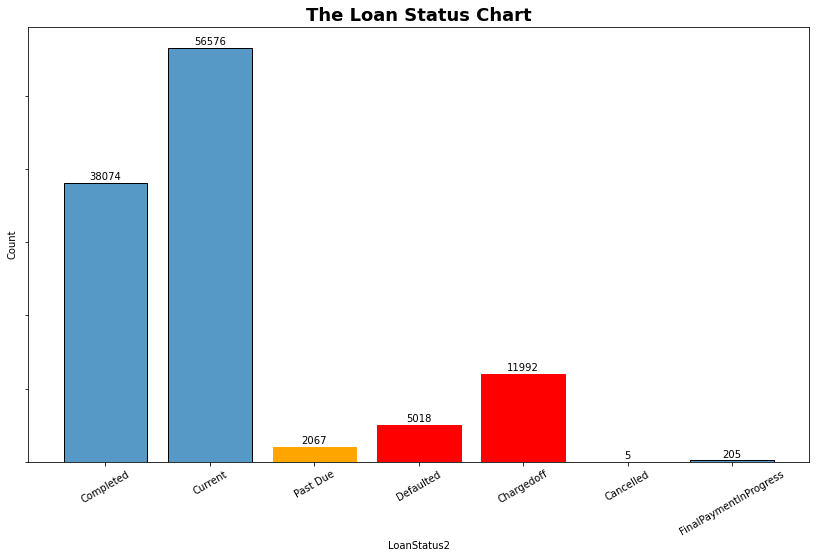

In [7]:
#plot the variable :
plt.figure(figsize = [14,8])
aa = sb.histplot( x='LoanStatus2',data=df,shrink=.8)
plt.xticks(rotation = 30)

#set colors for better impression on the targetted problem
aa.patches[2].set_color('orange')
aa.patches[3].set_color('red')
aa.patches[4].set_color('red');

#need to show values on the bar as the comparison between the biggest number (Current) and the lowest (Cancelled) is too wide
def show_values(axs):
    def show_on_1 (ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() + 400
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 
    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            show_on_1(ax)
    else:
        show_on_1(axs)

show_values(aa)
aa.set(yticklabels = [] )
aa.set_title('The Loan Status Chart', fontsize = 18, fontweight = 'bold');



We can see from the chart that the proportion numbers of defaulted and charged off are quite big. They take almost 15% from total number of loans. 11992 out of 113937 listing loans. Hmmm. seems quite a lot number. 

### Borrower APR distribution

In [8]:
#Input the missing borrower APR with Borrower Rate
df['BorrowerAPR'].fillna(df['BorrowerRate'], inplace=True)

In [9]:
#check
df[df['BorrowerAPR'].isnull()]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,LoanStatus2,ClosedDate,BorrowerAPR,BorrowerRate,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors


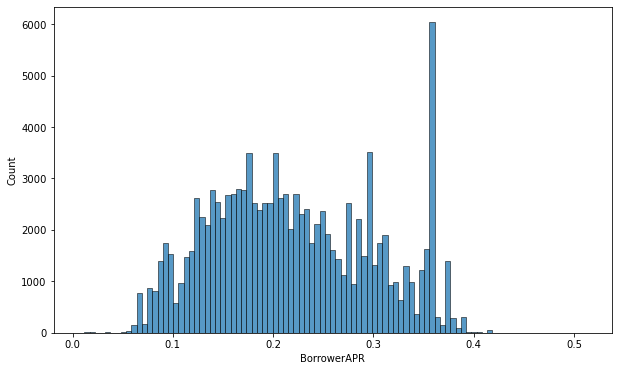

In [10]:
plt.figure(figsize = [10,6])
bb = sb.histplot( x='BorrowerAPR',data=df);

The distribution of Borrower APR shows there is a skew to the right. the mode is when the APR around 0.36

###  Prosper Score and Prosper Rating distribution

We would like to see the prosper score and prosper rating distribution in general (and roughly)

In [11]:
#tidy up the data first where Prosper Rating is null. Will combine with Credit Grade
#drop the NC columns
df = df.drop(df[df['CreditGrade']=='NC'].index)

In [12]:
#check
df.shape

(113796, 82)

In [13]:
#combining the Credit Grade into Prosper Rating

#fill the blanks with empty string
df['ProsperRating (Alpha)'].fillna("", inplace = True)
df['CreditGrade'].fillna("", inplace = True)

#since Credit grade is not null where Prosper Rating has value and vice versa, we can add them directly
#create a dummy prosper rating, as later we will drop this and use only ProsperRating (Alpha)
df['ProsperRating dummy'] = df['CreditGrade'] + df['ProsperRating (Alpha)']


In [14]:
#check if all Prosper Rating dummy already has value
df['ProsperRating dummy'].value_counts()


C     23994
B     19970
D     19427
A     17866
E     13084
HR    10443
AA     8881
        131
Name: ProsperRating dummy, dtype: int64

In [15]:
#drop the blanks one
df = df.drop(df[df['ProsperRating dummy']==""].index)

In [16]:
#check again
df['ProsperRating dummy'].value_counts()

C     23994
B     19970
D     19427
A     17866
E     13084
HR    10443
AA     8881
Name: ProsperRating dummy, dtype: int64

In [17]:
#drop the dummy after the alpha copy the value
df['ProsperRating (Alpha)'] = df['ProsperRating dummy'] 
df.drop(columns = 'ProsperRating dummy',inplace = True)

In [18]:
df.shape

(113665, 82)

In [19]:
#change variable into ordered cateogrical
df['ProsperRating (Alpha)'] = df['ProsperRating (Alpha)'].astype('category')

alpha = ['AA', 'A', 'B','C','D','E','HR']
prosper_alpha = pd.api.types.CategoricalDtype(ordered = True, categories = alpha)
df['ProsperRating (Alpha)'] = df['ProsperRating (Alpha)'].astype(prosper_alpha)

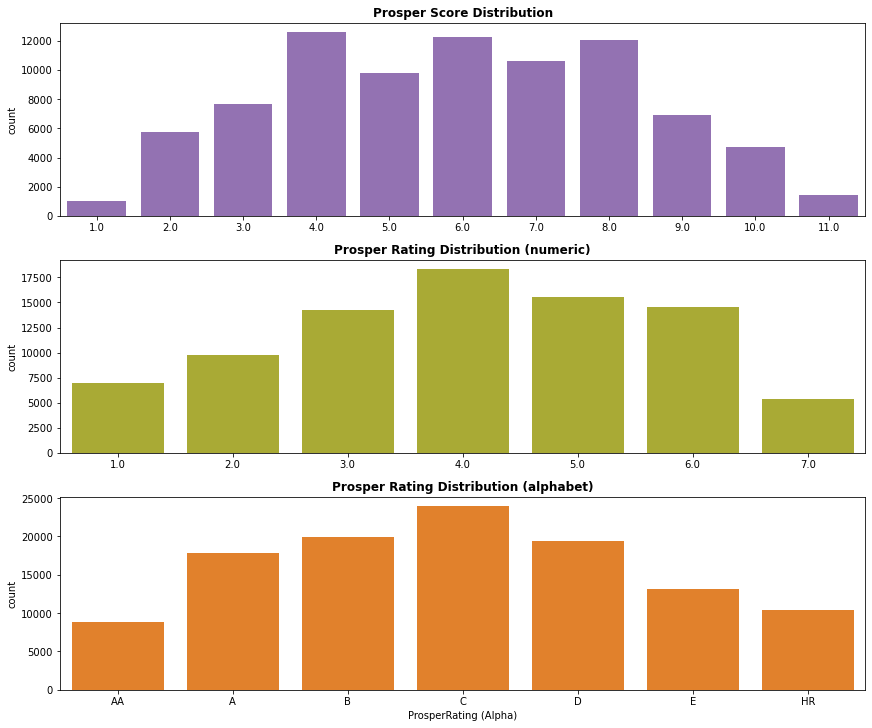

In [20]:
#plotting the distribution
fig, axes = plt.subplots (3,1,figsize = [12,10], constrained_layout=True)
bins = np.arange(1,11,1)
bb1 = sb.countplot(ax = axes[0], data =df, x = 'ProsperScore', color = sb.color_palette()[4])
bb2 = sb.countplot(ax = axes[1], data =df, x = 'ProsperRating (numeric)', color = sb.color_palette()[8])
bb3 = sb.countplot(ax = axes[2], data= df, x = 'ProsperRating (Alpha)', color = sb.color_palette()[1])
bb1.set_title('Prosper Score Distribution', fontsize = 12, fontweight = 'bold')
bb2.set_title('Prosper Rating Distribution (numeric)', fontsize = 12, fontweight = 'bold')
bb3.set_title('Prosper Rating Distribution (alphabet)', fontsize = 12, fontweight = 'bold')
bb1.set(xlabel = None)
bb2.set(xlabel = None);

From above graphic, the distribution of the prosper score looks a little bit normally distributed, although there are multiple peaks. 

While for Prosper Rating (both Alpha and numeric) it is more similar to normal distribution. 

### Income Range and Employment Status distribution



In [21]:
#change the type of variable for both
incomesss = ['$25,000-49,999','$50,000-74,999','$100,000+','$75,000-99,999','Not displayed','$1-24,999','Not employed','$0']
income_range = pd.api.types.CategoricalDtype(ordered = True, categories = incomesss)
df['IncomeRange'] = df['IncomeRange'].astype(income_range)

employment = ['Employed', 'Full-time', 'Self-employed','Not available','Other','Part-time','Not employed','Retired']
employment_range = pd.api.types.CategoricalDtype(ordered = True, categories = employment)
df['EmploymentStatus'] = df['EmploymentStatus'].astype(employment_range)


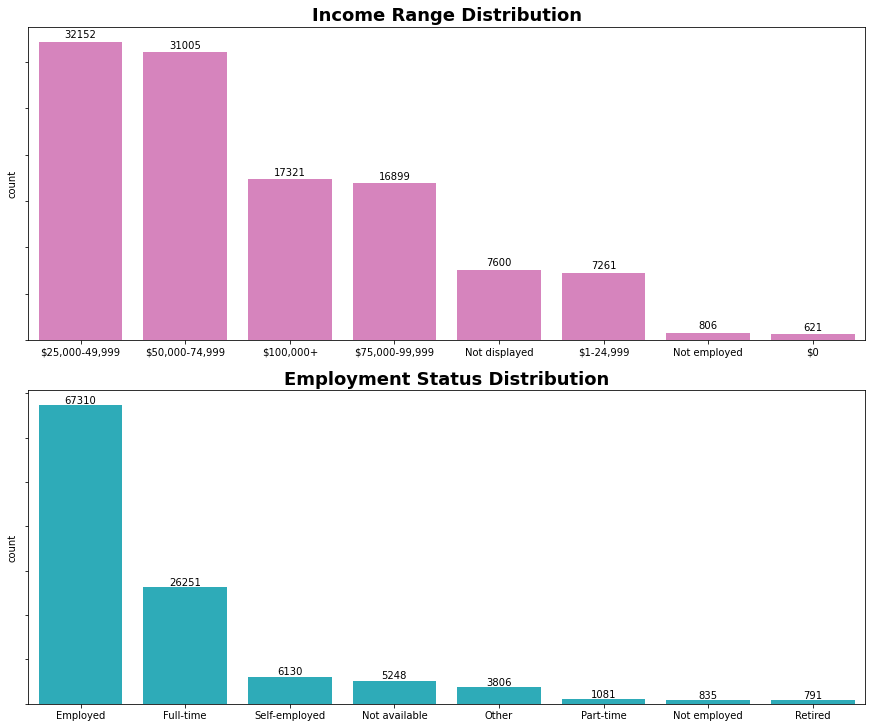

In [22]:
#plotting the distribution
fig, axes = plt.subplots (2,1,figsize = [12,10], constrained_layout=True)
cc1 = sb.countplot(ax = axes[0], data =df, x = 'IncomeRange', color = sb.color_palette()[6])
cc2 = sb.countplot(ax = axes[1], data =df, x = 'EmploymentStatus', color = sb.color_palette()[9])
cc1.set_title('Income Range Distribution', fontsize = 18, fontweight = 'bold')
cc2.set_title('Employment Status Distribution', fontsize = 18, fontweight = 'bold')
show_values(cc1)
show_values(cc2)
cc1.set(yticklabels=[], xlabel = None)
cc2.set(yticklabels=[], xlabel = None);

**Observation** : From the first graph above we can see that the Income Range distribution is high for both  USD 25,000-49,999 , and  USD 50,000-74,999. Or actually we can simply that the borrower is mostly come from income range USD 25,000-74,999, or middle income class - according to US data census 2015, US median salary is USD 56,516. 


As for the second graph we can see that most of the borrower comes from the Employed and Full-time. This is normal and understandable, and it is higher than employment - population ratio in US that ranging around 60 percent. The proportion of the borrower who work or self employed (which means they have income), counts almost 90 percent from all borrower. See below pie chart for better visual.    

In [23]:
#count the employment status
counting_employment = df.groupby('EmploymentStatus').size()
print(counting_employment)

EmploymentStatus
Employed         67310
Full-time        26251
Self-employed     6130
Not available     5248
Other             3806
Part-time         1081
Not employed       835
Retired            791
dtype: int64


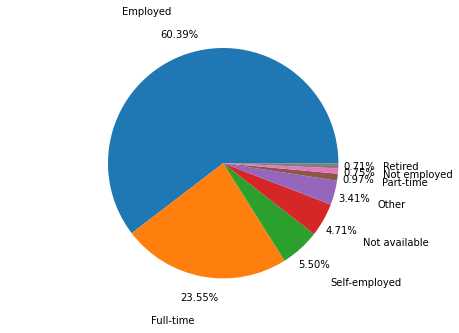

In [24]:
#setting the pie chart for better visualization
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(counting_employment, labels = employment, autopct='%1.2f%%', pctdistance=1.18, labeldistance=1.39)
plt.show();

### Number of Loan and Loan Amount per Quarter

I would like to know how many loan per quarter was made throughout the listing period 

In [25]:
#set the quarter period to categorical. we are not using date as it will be to dense, and the data already provided us the range period
#to be noted that if we ordered the period by Q is not possible, we will create a new column year and quarter, 
#then the quarter structure will be Year + Quarter, not Quarter + Year just like now
df['LoanOriginationQuarter'] = df['LoanOriginationQuarter'].astype('string')

df[['Quarter','Year']]= df.LoanOriginationQuarter.apply(lambda x: pd.Series(str(x).split(" ")))
df['LoanOriginationQuarter2'] = df['Year'] + " " + df['Quarter']

In [26]:
#change the variable to category so we can order/sort it
df['LoanOriginationQuarter2'] = df['LoanOriginationQuarter2'].astype('category')
df['LoanOriginationQuarter2'] = df['LoanOriginationQuarter2'].cat.as_ordered()

In [27]:
#test and check 
df[['LoanOriginationQuarter','LoanOriginationQuarter2']].head

<bound method NDFrame.head of        LoanOriginationQuarter LoanOriginationQuarter2
0                     Q3 2007                 2007 Q3
1                     Q1 2014                 2014 Q1
2                     Q1 2007                 2007 Q1
3                     Q4 2012                 2012 Q4
4                     Q3 2013                 2013 Q3
...                       ...                     ...
113932                Q2 2013                 2013 Q2
113933                Q4 2011                 2011 Q4
113934                Q4 2013                 2013 Q4
113935                Q4 2011                 2011 Q4
113936                Q1 2014                 2014 Q1

[113665 rows x 2 columns]>

In [28]:
#groupby Loan Origination Quarter with Count aggregate
loan_perq = df.groupby('LoanOriginationQuarter2').count()
loan_perq.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,LoanStatus2,ClosedDate,BorrowerAPR,BorrowerRate,...,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,Quarter,Year
LoanOriginationQuarter2,,,,,,,,,,,,,,,,,,,,,
2005 Q4,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21
2006 Q1,306,306,306,306,306,306,306,306,306,306,...,306,306,306,306,306,306,306,306,306,306
2006 Q2,1235,1235,1235,1235,1235,1235,1235,1235,1235,1235,...,1235,1235,1235,1235,1235,1235,1235,1235,1235,1235
2006 Q3,1906,1906,1906,1906,1906,1906,1906,1906,1906,1906,...,1906,1906,1906,1906,1906,1906,1906,1906,1906,1906
2006 Q4,2354,2354,2354,2354,2354,2354,2354,2354,2354,2354,...,2354,2354,2354,2354,2354,2354,2354,2354,2354,2354


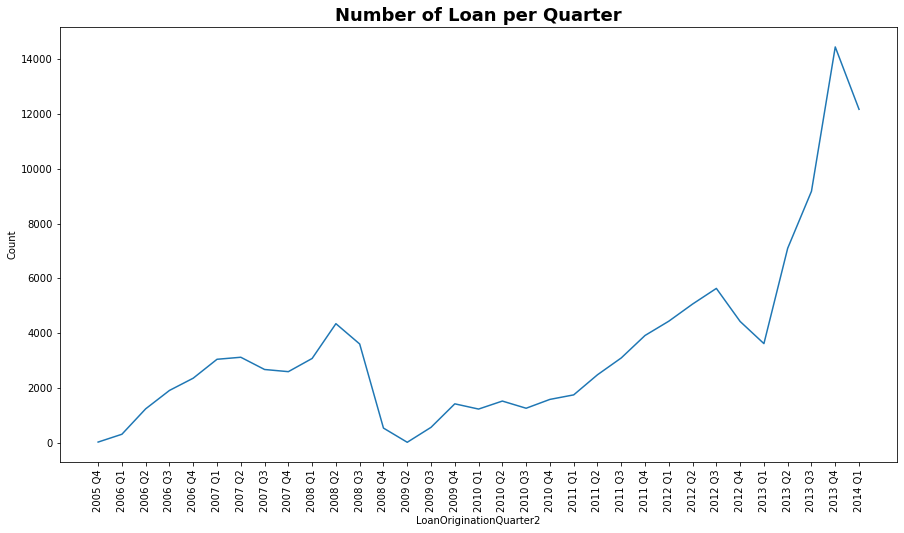

In [29]:
#create into line plot so we can see the trend better
plt.figure(figsize = [15,8])
dd1 = sb.lineplot(data=loan_perq, x="LoanOriginationQuarter2", y="ListingKey")
plt.xticks(rotation = 90)
dd1.set_title('Number of Loan per Quarter', fontsize = 18, fontweight = 'bold')
dd1.set_ylabel('Count');

From above line plot, we can see that there was something happens during 2008Q4 - 2009Q3 where the loan number was low. And there is no 2009Q1, so we understand there might be something happened - external impact perhaps. But we see increasing trend after 2009Q3 and went up so high in the last 4 Quarters. This should be the attention for the prosper teams work. Also then we will compare this to the other plot.

In [30]:
#groupby Loan Origination Quarter with sum aggregate
q_loan = df.groupby('LoanOriginationQuarter2').sum()
q_loan.head()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
LoanOriginationQuarter2,,,,,,,,,,,,,,,,,,,,,
2005 Q4,550,756,1.97145,1.97145,1.7427,0.0,0.0,0.0,0.0,0.0,...,-214.83,-123.3229,0.00,0.000000e+00,0.00,21.011,0,0,0.0,110
2006 Q1,431207,11016,50.94672,48.33290,45.7422,0.0,0.0,0.0,0.0,0.0,...,-8264.20,-5561.6890,258471.92,2.512181e+05,2310.39,306.000,0,0,0.0,9841
2006 Q2,15918127,44460,240.95013,229.80980,218.8835,0.0,0.0,0.0,0.0,0.0,...,-30368.07,-15273.1575,1363109.22,1.342757e+06,31664.04,1235.000,0,0,0.0,57620
2006 Q3,58174386,68616,390.52938,373.49930,359.0696,0.0,0.0,0.0,0.0,0.0,...,-51167.28,-31979.7518,2425744.77,2.386188e+06,65452.92,1906.000,0,0,0.0,106196
2006 Q4,139992011,84744,477.36192,455.27220,433.3412,0.0,0.0,0.0,0.0,0.0,...,-60607.06,-47269.2217,3178433.37,3.119511e+06,100699.34,2354.000,0,0,0.0,157891


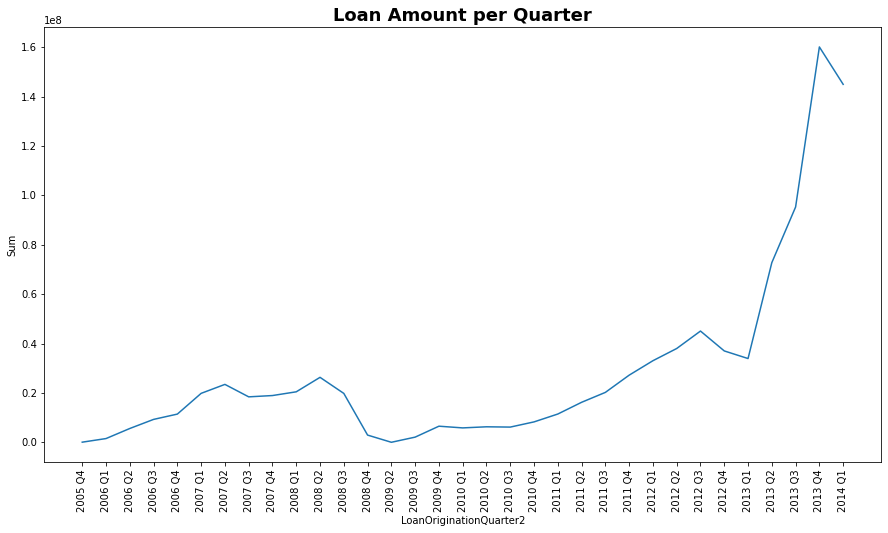

In [31]:
plt.figure(figsize = [15,8])
dd2 = sb.lineplot(data=q_loan, x="LoanOriginationQuarter2", y="LoanOriginalAmount")
plt.xticks(rotation = 90)
dd2.set_title('Loan Amount per Quarter', fontsize = 18, fontweight = 'bold')
dd2.set_ylabel('Sum');

We can see that the amount of the loan is inline with the number of loan from time to time. 

From these 2 line plot we can take note that it is important to analyze this Loan data, as it is getting more popular and it is desirable to provide insights to our team and investors

### Other Numerical Variables' distribution

I am going to plot some of the numerical variables which may have correlation to the Borrower APR and Prosper Rating

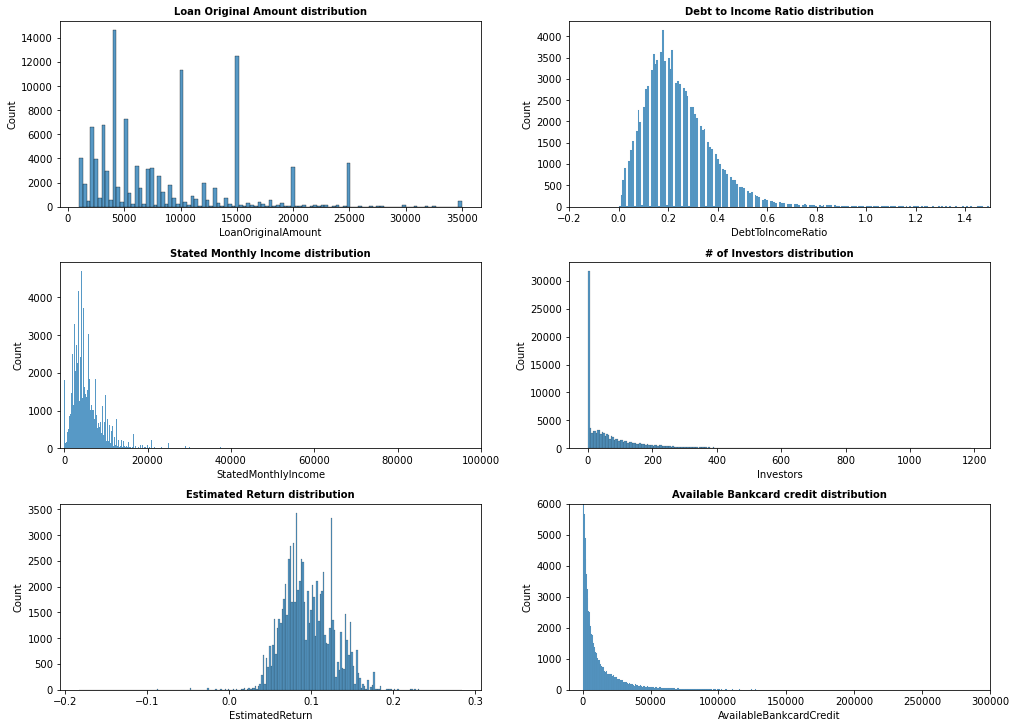

In [94]:
fig, axes = plt.subplots (3,2,figsize = [14,10], constrained_layout=True)

#LoanOriginalAmount
dd3 = sb.histplot(ax= axes[0,0], x='LoanOriginalAmount',data=df)
dd3.set_title('Loan Original Amount distribution', fontsize = 10, fontweight = 'bold')

#DebtToIncomeRatio
dd4 = sb.histplot(ax= axes[0,1], x='DebtToIncomeRatio',data=df)
dd4.set_xlim([-0.2,1.5])
dd4.set_title('Debt to Income Ratio distribution', fontsize = 10, fontweight = 'bold')

#StatedMonthlyIncome
dd5 = sb.histplot(ax= axes[1,0], x='StatedMonthlyIncome',data=df)
dd5.set_xlim([-1000, 1e5])
dd5.set_title('Stated Monthly Income distribution', fontsize = 10, fontweight = 'bold')

#Investors
dd6 = sb.histplot(ax= axes[1,1], x='Investors',data=df)
dd6.set_title('# of Investors distribution', fontsize = 10, fontweight = 'bold')

#EstimatedReturn
dd7 = sb.histplot(ax= axes[2,0], x='EstimatedReturn',data=df)
dd7.set_title('Estimated Return distribution', fontsize = 10, fontweight = 'bold')

#AvailableBankcardCredit
dd8 = sb.histplot(ax= axes[2,1], x='AvailableBankcardCredit',data=df)
dd8.set_xlim([-1e4, 3e5])
dd8.set_ylim([0,6000])
dd8.set_title('Available Bankcard credit distribution', fontsize = 10, fontweight = 'bold');

#some variables needs to be limit as they have outliers which makes chart not representative

**Loan Original Amount** : Skewed to the right and with the mode is in range USD 4,000 Loan Amount

**Debt to Income Ratio** : A little skewed to the right with frequent peak at around 0.2 

**Stated Monthly Income** : Skewed to the right, with peak around USD 5,000

**Investors** : Skewed to the right, with the most is 0 investor. 

**Estimated Return** : Estimated Return a little bit skewed to the right, with the most frequent is at 0.07

**Available Bankcard Credit** : Skewed to the right as well, with a decreasing frequency as the available bankcard credit goes higher. 

## II. Bivariate Exploration

We will take a look of something related to each other

First thing first :

### Prosper Rating to Borrower APR

Lets see the relationship between these 2 main focus variables


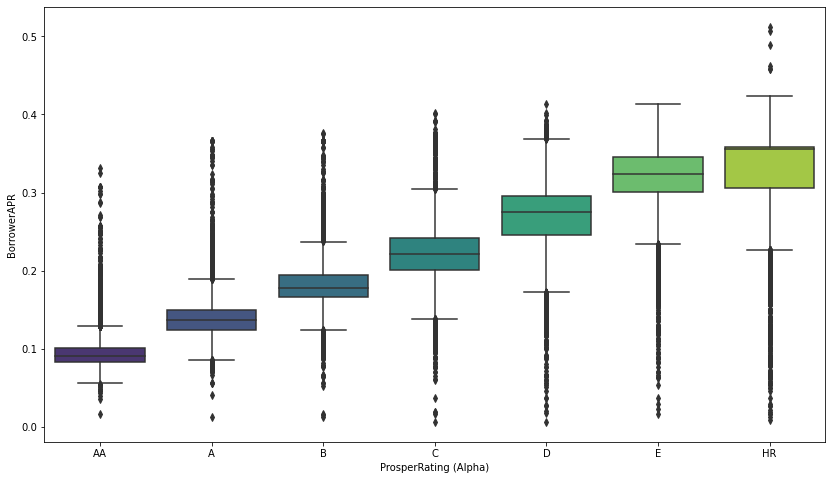

In [33]:
plt.figure(figsize = [14,8])
sb.boxplot(data = df, y = 'BorrowerAPR', x = 'ProsperRating (Alpha)', palette = 'viridis');

It's obvious that the Borrower APR has relationship to Prosper Rating. Since it will be likely that Prosper Rating comes first before the team decide how big is the APR, therefore we can conclude that Prosper Rating affect the value of Borrower APR. 

###  Original Loan Amount and Term to Borrower APR
First of all, I would like to make sure that Prosper team has normally analyze loan application and give the rate to the borrower like a normal lender institution does : The bigger the loan amount, the smaller the borrower percentage rate is, and the longer the loan, the smaller percentage rate is. 


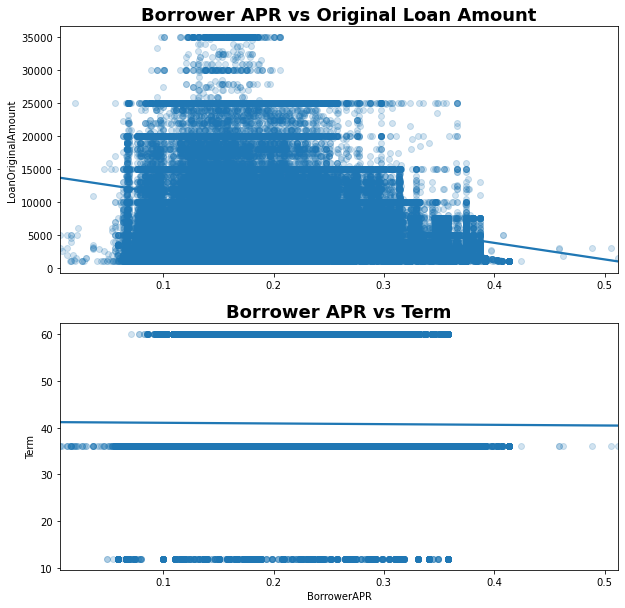

In [34]:
#first we plot the scatter

fig, axes = plt.subplots (2,1,figsize = [10,10])

ee1 = sb.regplot(ax= axes[0], data = df, x = "BorrowerAPR", y = "LoanOriginalAmount", scatter_kws={'alpha': 0.2} )
ee1.set_title('Borrower APR vs Original Loan Amount', fontsize = 18, fontweight = 'bold')
ee1.set_xlabel(None)

ee2 = sb.regplot(ax = axes[1], data = df, x = "BorrowerAPR", y = "Term", scatter_kws={'alpha': 0.2} )
ee2.set_title('Borrower APR vs Term', fontsize = 18, fontweight = 'bold');

There is negative correlation between Borrower APR and Loan Original Amount - although not too strong, where the bigger the loan amount, the smaller the percentage rate is. This is understandable and inline with general assessment. However we cannot find any correlation with the second graph, the APR vs Term. Normally the longer the loan, the smaller the APR. However we will find this later in the multivariate analysis, where the term may have correlation when compared together with APR and Loan Original Amount 
    
    

###  Original Loan Amount and Term to Prosper Rating

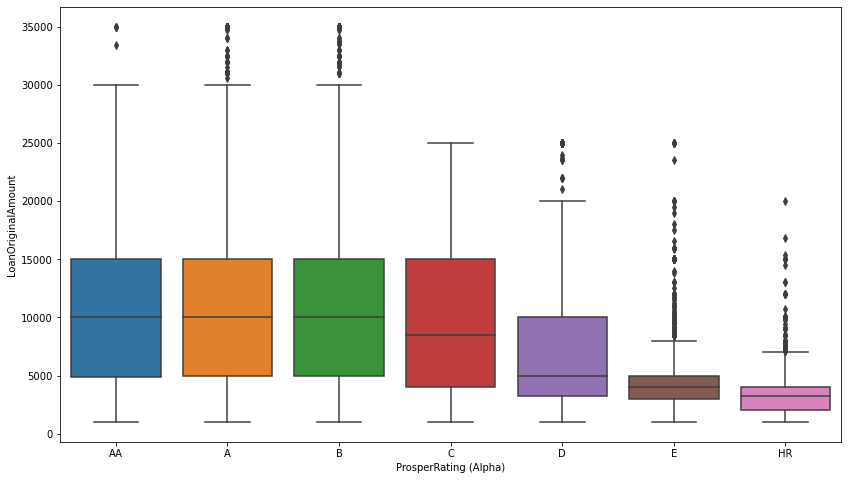

In [91]:
#Original Loan Amount to Prosper Rating
plt.figure(figsize = [14,8])
ee3 = sb.boxplot(data=df, x="ProsperRating (Alpha)", y = "LoanOriginalAmount");

In [36]:
#consolidated the Term
term_count =df.groupby(['ProsperRating (Alpha)','Term']).size()
term_count = term_count.reset_index(name = 'count')
term_count = term_count.pivot(index = 'ProsperRating (Alpha)', columns = 'Term', values = 'count')


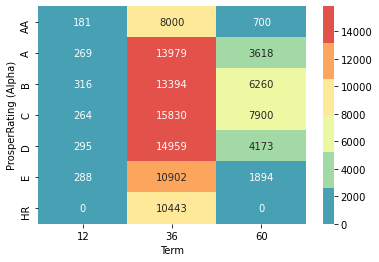

In [37]:
#plot
colormap = sb.color_palette("Spectral_r")
ee4 = sb.heatmap(term_count, annot = True, fmt = 'd', cmap = colormap)

From the violin plot, we can see that there is no distinctive relations between Loan Original Amount to the Prosper Rating. Although the gap is clear between Group AA to B, C-D, and E-HR, we can only conclude that in group AA to B, the dispersion is wide, with maximum reach upper limit USD 35,000, and slightly high frequency is ranging from 0 to 15,000. In group C-D the dispersion is smaller, with max in USD 25,000, slightly high frequency is ranging from 0 to 15,000 with more frequency on D rating. In E-HR the frequency intensifies from 0 to $10,000, with maximum loan is lower than other. 

Term has no impact to Prosper Rating. We can see that on both end, that are AA and HR, have low frequency, and high in the quartile to middle rating. 

### Credit Score Range

There is an interesting source that I read that Credit Score range may have significant effect on the loan application.  Based on [Fico](https://www.experian.com/blogs/ask-experian/credit-education/score-basics/what-is-a-good-credit-score/#:~:text=There%20are%20%22base%22%20FICO%C2%AE,range%20as%20670%20to%20739.), a good credit score is above 670 (as its lower credit score). We would like to see its relation to the variables we focus on. 

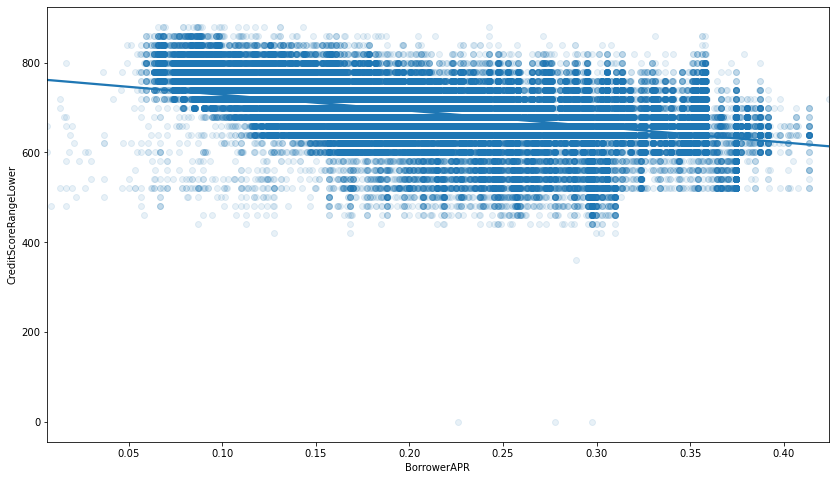

In [38]:
#in relation to Borrower APR
plt.figure(figsize = [14,8])
ff1 = sb.regplot(data=df, x="BorrowerAPR", y = "CreditScoreRangeLower", scatter_kws={'alpha': 0.1});


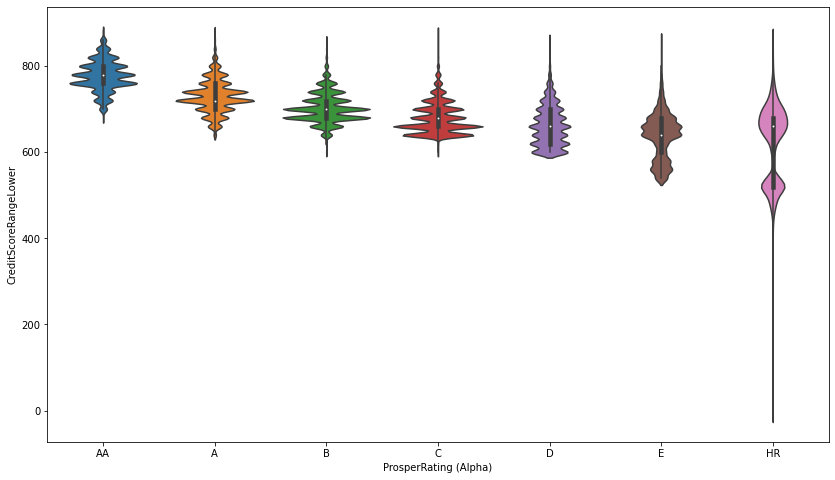

In [39]:
#in relation to  Prosper Rating
plt.figure(figsize = [14,8])
ff2 = sb.violinplot(data=df, x="ProsperRating (Alpha)", y = "CreditScoreRangeLower");


Credit Score Range has relationship with Borrower APR, although it's not strong. Its negative relationship shows that the higher credit score the lower the APR is. The same goes to the relation with Prosper Rating, The higher the credit score the higher potential the Prosper Rating gets good rank. One obvious thing, if credit score grades below 600, the application will get Prosper Rating E or HR. It will never get AA, A, B, C, or D. However, there is a disturbing fact that the average of HR ratings'credit score range lower is higher than rating E's and on par with rating D's average. 

### Correlation between interesting Numerical Variables

Now we want to see the correlation between Numerical Variables. The variables I picked are ones that I thought it may have effect on one another. 

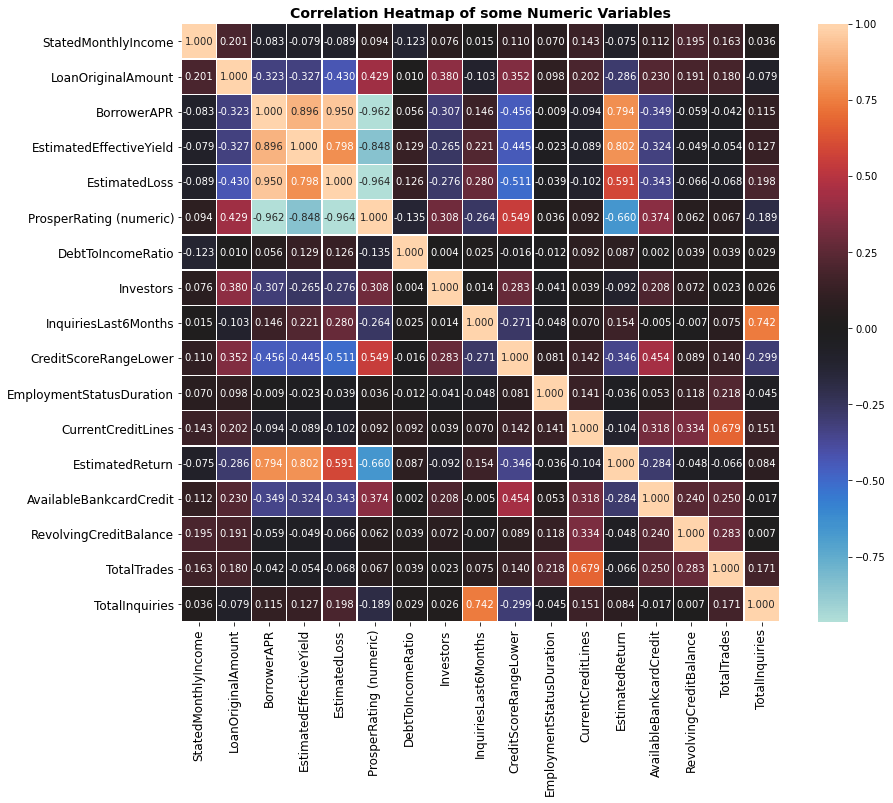

In [40]:
#we also plot the heatmap to see the correlation value/strength between these variables, which may have correlated to each other
corr_vars2 = ['StatedMonthlyIncome','LoanOriginalAmount', 'BorrowerAPR', 'EstimatedEffectiveYield', 'EstimatedLoss', 
              'ProsperRating (numeric)', 'DebtToIncomeRatio', 'Investors', 'InquiriesLast6Months', 'CreditScoreRangeLower', 
              'EmploymentStatusDuration', 'CurrentCreditLines', 'EstimatedReturn', 'AvailableBankcardCredit', 'RevolvingCreditBalance',
              'TotalTrades', 'TotalInquiries']
plt.figure(figsize = [14,11]);
gg1 = sb.heatmap(df[corr_vars2].corr(), annot = True, fmt = '.3f', center=0, square = True, linewidths = 0.3)
gg1.set_title('Correlation Heatmap of some Numeric Variables', fontsize = 14, fontweight = 'bold')
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12); 

There are many things that we can deduct from above heatmap, but I will be focus on variable that we are focusing on 

**BorrowerAPR** 

- Borrower APR is similar to Borrower Rate and Lender Yield (based on the definition)
- Borrower APR, is strongly correlated with Prosper Rating and Estimated Return
- Moderately correlated with Loan Original Amount and number of Investors. 

**ProsperRating (numeric)**
- Prosper Rating is strongly correlated with Estimated Return and Borrower ARP (Rate and Lender Yield as well)
- Moderately correlated with Loan Original Amount
- Weakly correlated by number of Investors. I think the higher the prosper rating is the more interesting the loan is for the investors
- Also weakly correlated with Available Bankcard Credit

### Income Range impact

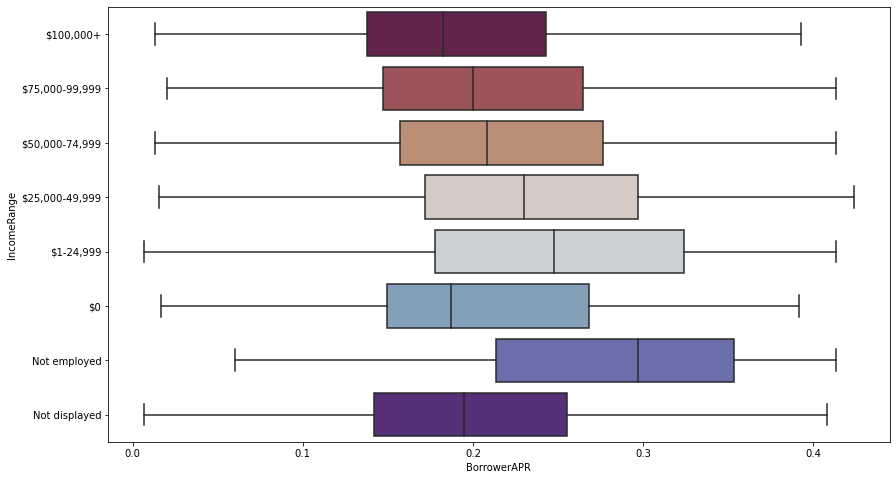

In [41]:
#in relation to Borrower APR

#re-order the IncomeRange again for better visualization
income_sort = ['$100,000+' ,'$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999','$0','Not employed','Not displayed']
income_range_2 = pd.api.types.CategoricalDtype(ordered = True, categories = income_sort)
df['IncomeRange'] = df['IncomeRange'].astype(income_range_2)

plt.figure(figsize = [14,8])
hh1 = sb.boxplot(data = df, y = 'IncomeRange', x = 'BorrowerAPR', palette = 'twilight_shifted_r', showfliers = False)

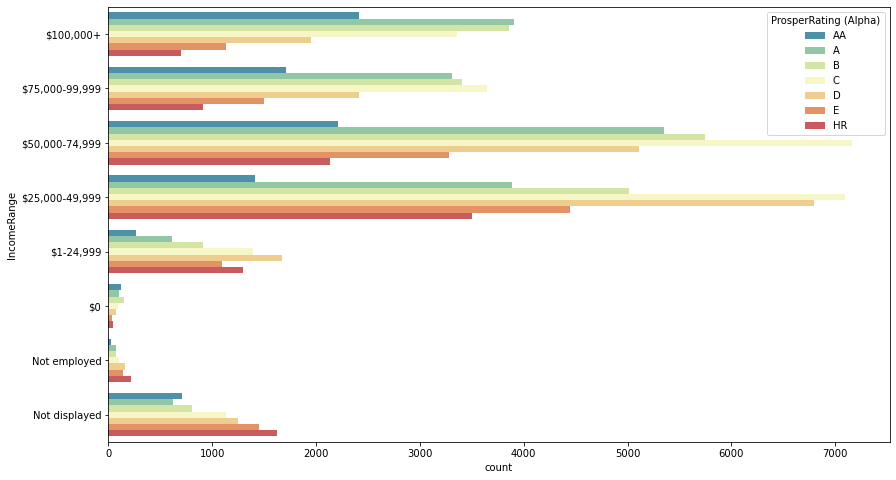

In [42]:
#in relation to Prosper Rating
plt.figure(figsize = [14,8])
hh2 = sb.countplot(data = df, y = 'IncomeRange', hue = 'ProsperRating (Alpha)', palette = 'Spectral_r')

Income Range has relation to the Borrower APR although it is not absolute clear, but we may assume that for stated Income Range, especially if not USD 0, there is negative relationship : The bigger the income range group, the lower the Borrower APR is. However, we cannot assume anything from the Income range group USD 0, Not Employed and Not Displayed. I think it is better to use Stated Monthly Income instead of this variable. 

it is also similar with the relation of Income Range to Prosper Rating. For those where Stated Income Range is quantified, we cannot determine the pattern and relation. However for Not Employed and Not Displayed, we may assume that more likely the loan application will be listed towards 'not good' Rating (C to HR)

### Stated Monthly impact

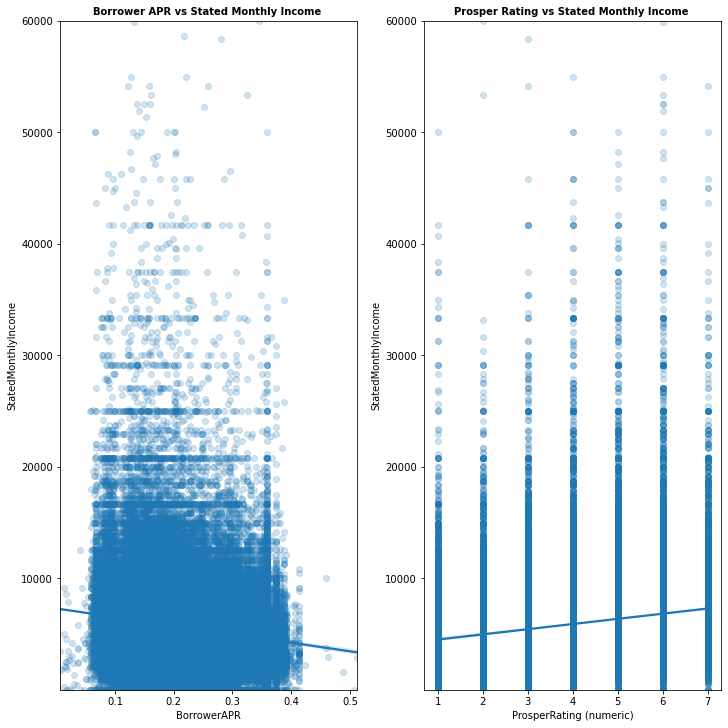

In [43]:
fig, axes = plt.subplots (1,2,figsize = [10,10],constrained_layout=True)

hh4 = sb.regplot(ax= axes[0], data = df, x = "BorrowerAPR", y = "StatedMonthlyIncome", scatter_kws={'alpha': 0.2} )
hh4.set_title('Borrower APR vs Stated Monthly Income ', fontsize = 10, fontweight = 'bold')
hh4.set_ylim(1e-2,6e4)

hh5 = sb.regplot(ax= axes[1], data = df, x = "ProsperRating (numeric)", y = "StatedMonthlyIncome", scatter_kws={'alpha': 0.2} )
hh5.set_title('Prosper Rating vs Stated Monthly Income ', fontsize = 10, fontweight = 'bold')
hh5.set_ylim(1e-2,6e4)
hh5.set_xlim(0.7,7.3);


Stated Monthly Income has slight negative relationship with both Borrower APR and Prosper Rating. The bigger the stated monthly Income, the bigger the possibility is to lower the Borrower APR and to lower the risk of the loan (getting a better grade of loan). We use term possible as it is not guaranteed. Also from the correlation matrix before, Stated Monthly Income showed no correlation.

### Income Verifiable impact

In [44]:
#combine 2 variables into new DF
verify_count =df.groupby(['ProsperRating (Alpha)','IncomeVerifiable']).size()
verify_count = verify_count.reset_index(name = 'count')
verify_count = verify_count.pivot(index = 'ProsperRating (Alpha)', columns = 'IncomeVerifiable', values = 'count')

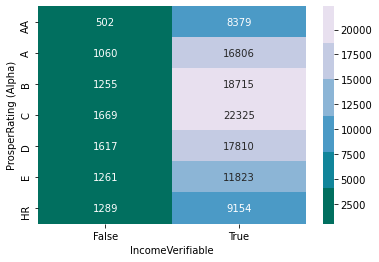

In [45]:
#lets try using heatmap
colormap = sb.color_palette("PuBuGn_r")
hh3 = sb.heatmap(verify_count, annot = True, fmt = 'd', cmap=colormap)


In [46]:
#above chart is not great to read, lets use clustered barplot
df['IncomeVerifiable'] = df['IncomeVerifiable'].apply(lambda x:x)

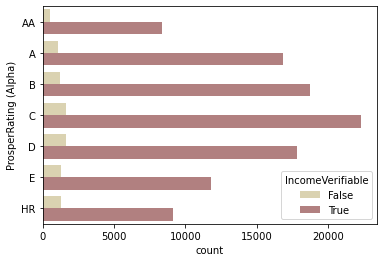

In [47]:
hh4 = sb.countplot(data = df, y = 'ProsperRating (Alpha)', hue = 'IncomeVerifiable', palette = 'pink_r')

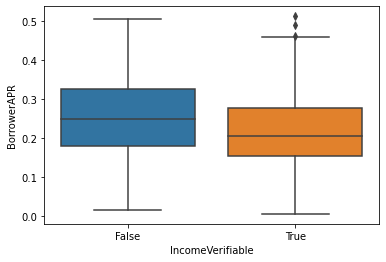

In [48]:
hh5 = sb.boxplot(data=df, x='IncomeVerifiable', y = 'BorrowerAPR')

Income Verifiable has no relation to the Prosper Rating, we cannot see the pattern as either False or True, it will give the same possibility of Prosper Rating, for every level of Prosper Rating. While it may a little impact to the Borrower APR, but it is not that obvious, If income is verified, the possibility is slightly higher to get lower Borrower APR.  

### Employment Status Impact

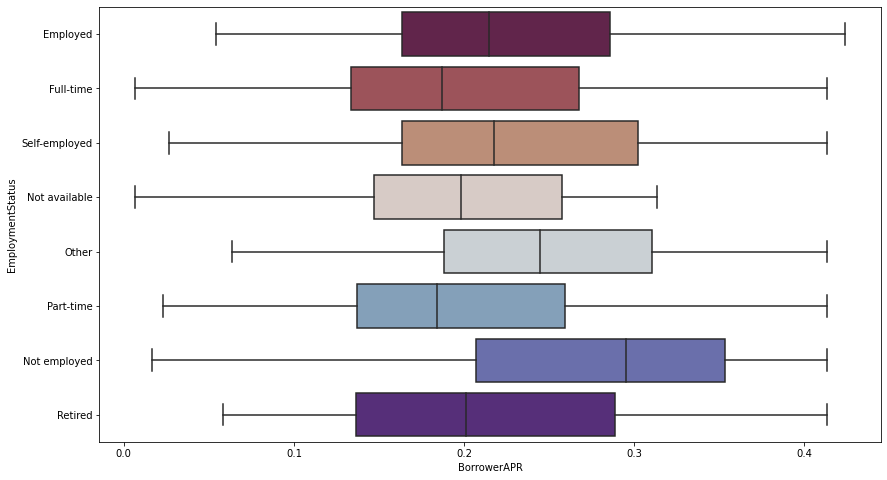

In [49]:
#in relation to Borrower APR
plt.figure(figsize = [14,8])
ii1 = sb.boxplot(data = df, y = 'EmploymentStatus', x = 'BorrowerAPR', palette = 'twilight_shifted_r', showfliers = False)

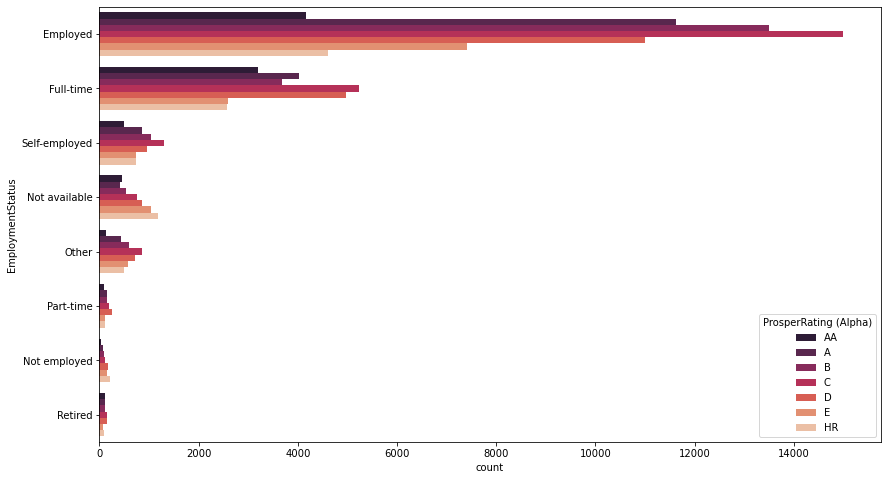

In [50]:
#in relation to Prosper Rating
plt.figure(figsize = [14,8])
ii2 = sb.countplot(data = df, y = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', palette = 'rocket')

We cannot see distinctive relations of Employment Status to both Borrower APR and Prosper Rating. The pattern in Employed, Full-time, Self_Employed, Other and Part-time is similar, but it differs when they are Not Available and Not Employed.  

### Available Bankcard Credit

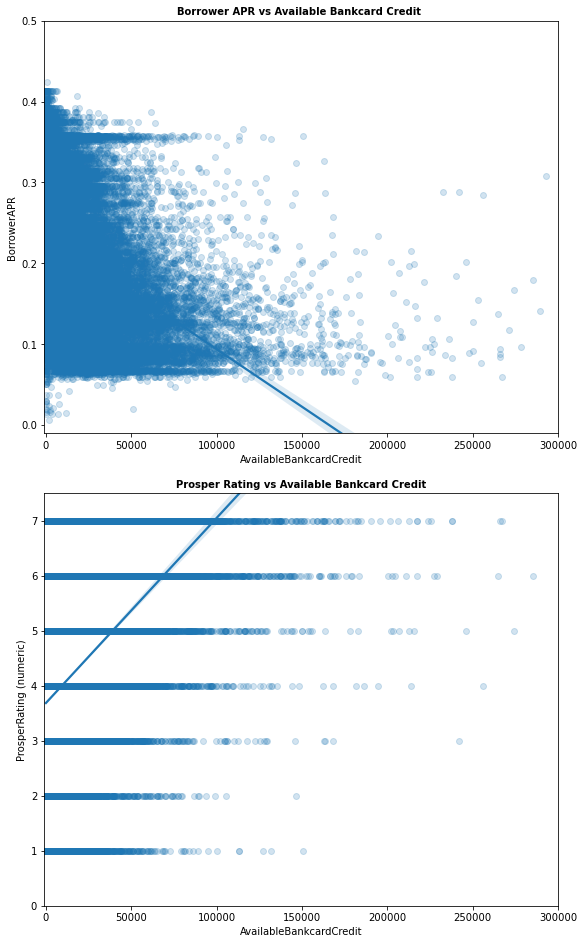

In [51]:
fig, axes = plt.subplots (2,1,figsize = [8,13],constrained_layout=True)

ii3 = sb.regplot(ax= axes[0], data = df, x = "AvailableBankcardCredit", y = "BorrowerAPR", scatter_kws={'alpha': 0.2} )
ii3.set_title('Borrower APR vs Available Bankcard Credit ', fontsize = 10, fontweight = 'bold')
ii3.set_xlim(-1000, 300000)
ii3.set_ylim(-0.01, 0.5)

ii4 = sb.regplot(ax= axes[1], data = df, x = "AvailableBankcardCredit", y = "ProsperRating (numeric)", scatter_kws={'alpha': 0.2} )
ii4.set_title('Prosper Rating vs Available Bankcard Credit', fontsize = 10, fontweight = 'bold')
ii4.set_xlim(-1000, 300000)
ii4.set_ylim(0,7.5);

OK, finally we get another variables that shows good projection. There is negative correlation for Available Bankcard Credit, related to Borrower APR and positive correlation to Prosper Rating. 

The bigger the available value of Bankcard credit, the lower the Borrower APR is, and the higher possibility of getting a good grade Prosper Rating. 

### Is Borrower Home Owner? 

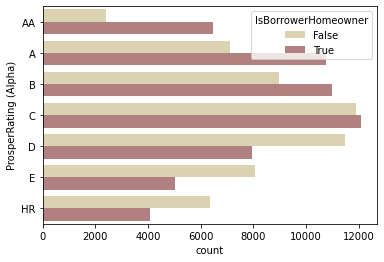

In [52]:
df['IsBorrowerHomeowner'] = df['IsBorrowerHomeowner'].apply(lambda x:x)
ii5 = sb.countplot(data = df, y = 'ProsperRating (Alpha)', hue = 'IsBorrowerHomeowner', palette = 'pink_r')

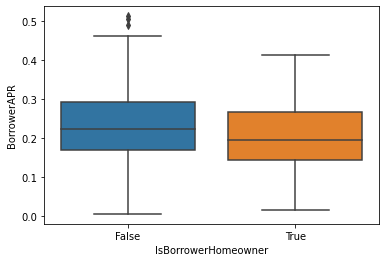

In [53]:
ii6 = sb.boxplot(data=df, x='IsBorrowerHomeowner', y = 'BorrowerAPR')

Looks like is borrower homeowner is also quite a good variable to give relation to the result for both focused variables. In Prosper Rating it is clear that if the borrower is homeowner, the possibility to get AA to C grade is higher than if not. But In grade D-HR, more borrower are classified as not a home owner. 

In the Borrower APR it is not quite too distinct as we can compare only two element, similar to the IncomeVerifiable variable. 

### Debt to Income Ratio

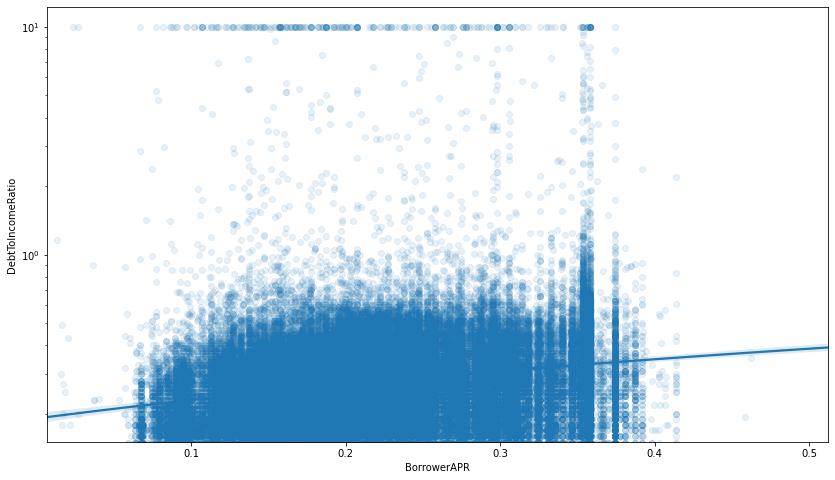

In [81]:
#in relation to Borrower APR
plt.figure(figsize = [14,8])
ii7 = sb.regplot(data=df, x="BorrowerAPR", y = "DebtToIncomeRatio", scatter_kws={'alpha': 0.1})
plt.yscale('log');

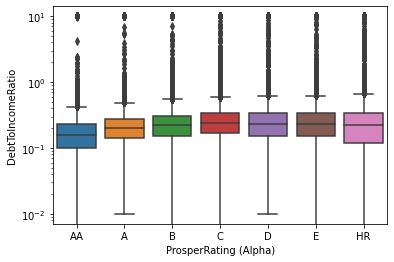

In [83]:
#in relation to Prosper Rating 
ii8 = sb.boxplot(data=df, x='ProsperRating (Alpha)', y = 'DebtToIncomeRatio')
plt.yscale('log');


WE see that Debt to Income Ratio has no significant relation to either Borrower APR and Prosper Rating. Although if you zoom in the Borrower APR and set limit the Debt to Income Ratio to 4 you may see clear regression, however we cannot diminish the value of 10 in Debt to Income Ratio, as the frequency is not that few. 

### Investors

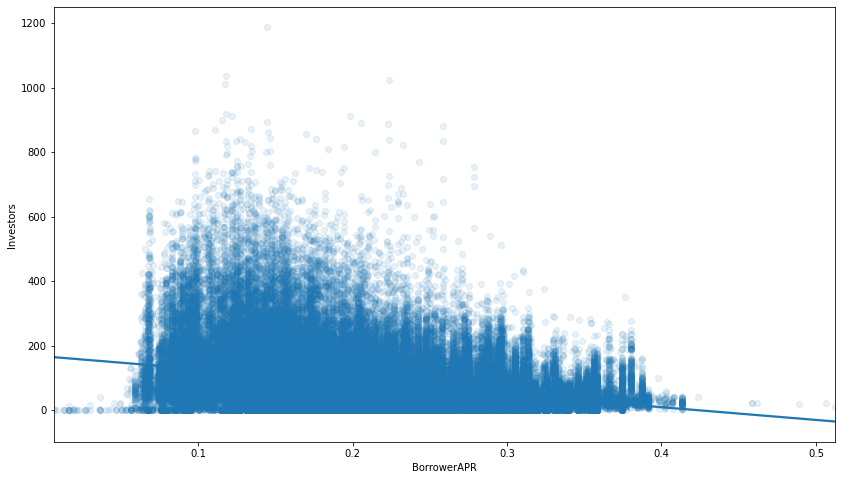

In [77]:
#in relation to Borrower APR
plt.figure(figsize = [14,8])
ii9 = sb.regplot(data=df, x="BorrowerAPR", y = "Investors", scatter_kws={'alpha': 0.1});

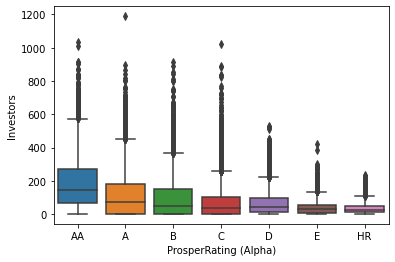

In [79]:
#in relation to Prosper Rating 
ii10 = sb.boxplot(data=df, x='ProsperRating (Alpha)', y = 'Investors')

We see that Investors has effect on both Borrower APR and Prosper Rating. However as we know that usually investors put their investment after they see the characteristic or the potential of the loan application. So in this case it is the Prosper Rating that may have impact the number of investors, and the number of investors affect the borrower APR rating 

### Calculating Performance : Loan Status vs Prosper Rating

We have already create a time series variable as in Univariate session, therefore we will use them to see if the Prosper Rating really represent the outcome of the loan or not.

Now we want to assume a bad or failed loan is if the loan outcome is defaulted or chargedoff. And the completed (or 'successful') loan will be the opposite where loan is already classified as completed. 
First, we set limitation and classification: 
- Past Due & Cancelled loans will not be counted as of now.
- Completed and Final Payment in Progress loans will be classified as 'Completed' 
- Current loans will not be counted as of now. We only want to check loan that is finished or assume to be finished.  
- Chargedoff and Defaulted loans will be classified as 'Default and Charged-off'

In [54]:
#lets create new df and LoanStatus3 variable :) 
target = ['Completed', 'FinalPaymentInProgress', 'Defaulted','Chargedoff']
df_check = df[df['LoanStatus2'].isin(target)]

#check if the number is correct
df_check.shape

(55017, 85)

In [55]:
#change to string first
df_check['LoanStatus2'].astype('object')

0                      Completed
2                      Completed
11                     Completed
15                     Defaulted
17                    Chargedoff
                   ...          
113927                 Completed
113928                 Completed
113929                 Completed
113933    FinalPaymentInProgress
113935                 Completed
Name: LoanStatus2, Length: 55017, dtype: object

In [56]:
#create LoanStatus3 and classify 
df_check['LoanStatus3'] = df_check['LoanStatus2']
df_check['LoanStatus3'] = df_check['LoanStatus3'].replace('FinalPaymentInProgress', 'Completed')
df_check['LoanStatus3'] = df_check['LoanStatus3'].replace(['Defaulted','Chargedoff'], 'Defaulted & Chargedoff')

In [57]:
#check
df_check['LoanStatus3'].value_counts()

Completed                 38115
Defaulted & Chargedoff    16902
Name: LoanStatus3, dtype: int64

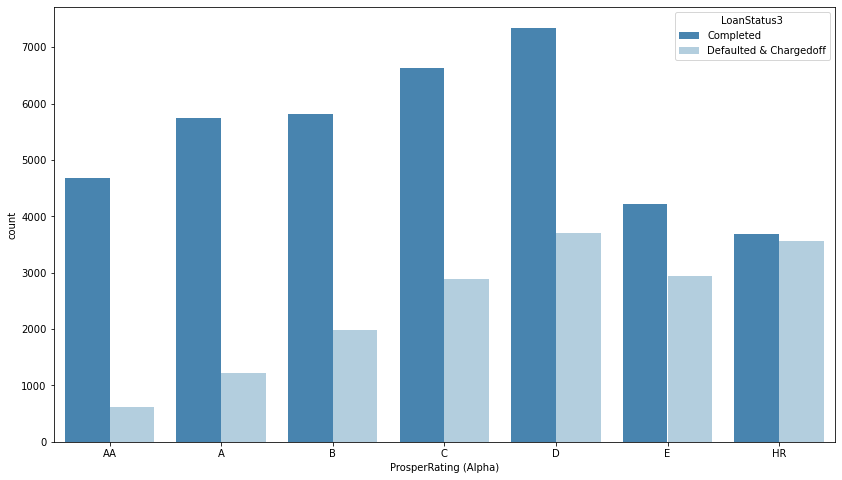

In [58]:
df_check['LoanStatus3'] = df_check['LoanStatus3'].apply(lambda x:x)
plt.figure(figsize = [14,8])
ii11 = sb.countplot(data = df_check, x = 'ProsperRating (Alpha)', hue = 'LoanStatus3', palette = 'Blues_r')

OK! this is good. We get that Prosper rating reflects or impact the outcome of the Loan. It is better if we can find the rate of success of a loan by using this variable. 

In [59]:
#Lets check the percentage of successful 
#grouping
success = df_check.groupby(['ProsperRating (Alpha)','LoanStatus3']).size()
success = success.reset_index(name = 'count')
success = success.pivot(index = 'ProsperRating (Alpha)', columns = 'LoanStatus3', values = 'count' )

In [60]:
#create new DF
success['RateSuccess'] = success['Completed'] / (success['Completed']+success['Defaulted & Chargedoff'] ) * 100
df_success = pd.DataFrame(success)

In [61]:
#reset index and input new Prosper Rating column ( i need to find better way to do this!)
df_success['ProsperRating'] = ['AA','A','B','C','D','E','HR']
df_success.reset_index(drop=True, inplace=True)

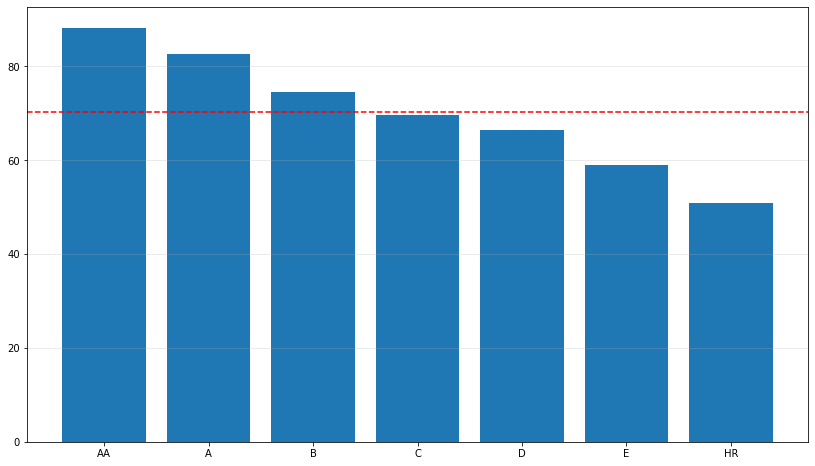

In [62]:
mean_score = df_success['RateSuccess'].mean()
fig, ax = plt.subplots(figsize=(14, 8))
g= ax.bar(df_success['ProsperRating'], df_success['RateSuccess'])
ax.grid(axis='y', alpha=0.3)
line  = ax.axhline(mean_score, linestyle='--', color='r')

OK!  This is what we we want to get, the percentage rate of success. This can be applied to the Current Loans, and team can anticipate the outcome. also it will be good for investors to see the potential result of the incoming loan application. 

## III. Multivariate Exploration

### Correlation Matrice : Income Range on Prosper Rating and Borrower APR


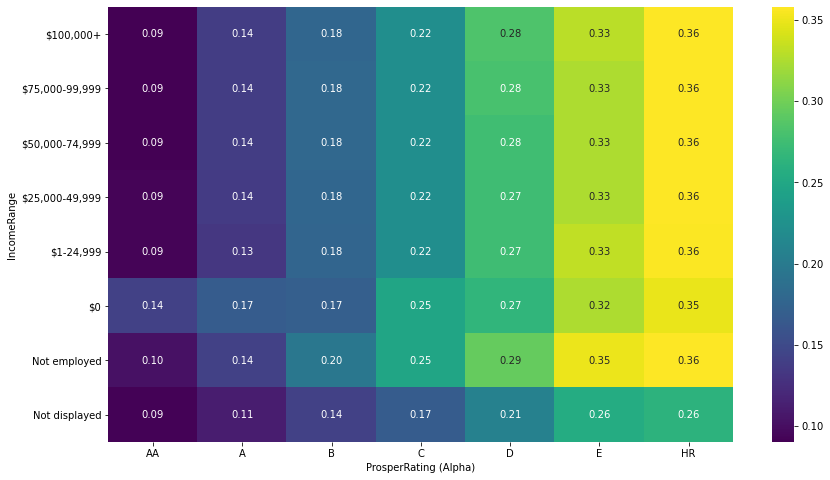

In [63]:
#plot
plt.figure(figsize = [14,8])
median_apr = df.groupby(['ProsperRating (Alpha)','IncomeRange']).median()['BorrowerAPR']
median_apr = median_apr.reset_index(name = 'MedianBorrowerAPR')
median_apr1 = median_apr.pivot(index = 'IncomeRange', columns = 'ProsperRating (Alpha)', values = 'MedianBorrowerAPR')
sb.heatmap(median_apr1, annot = True,  fmt = '.2f', cmap = 'viridis');


Turned out that Income Range may not have direct impact to the Borrower APR and Prosper Rating. As the Income Range for range more than USD 0, gives the same Borrower APR results in all levels. AS mentioned before it is better to use the Stated Monthly Income rather than Income Range. Many occassion, the Not Displayed Range, has Stated Monthly Income

### Loan Original Amount on Prosper Rating and Borrower APR

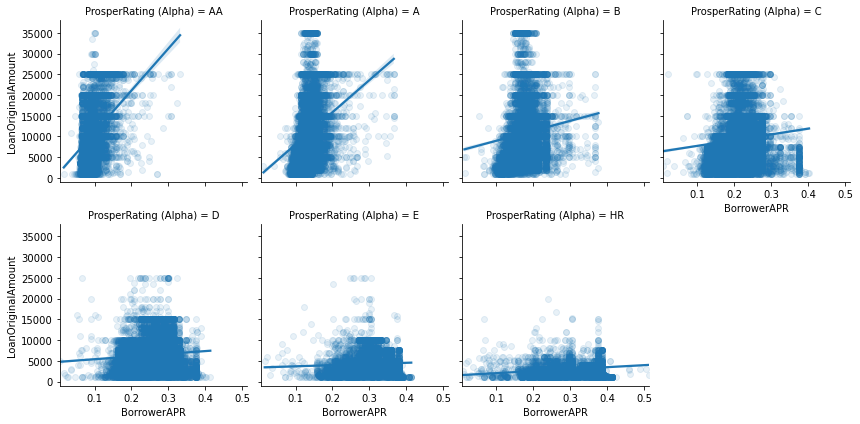

In [64]:
kk1 =sb.FacetGrid(data=df,col='ProsperRating (Alpha)',col_wrap=4)
kk1.map(sb.regplot,'BorrowerAPR','LoanOriginalAmount',scatter_kws={'alpha': 0.1});

This visual represent a bigger picture or summary from the bivariate visual on the same variable. Here we can see that Loan amount on grup C to HR is scattered on the lower amount, with the position of borrower APR tends to scramble on the flat and wide side, showing there are many occassions where value of the borrower APR is higher. 

The line showing that the better the ratings, the steeper the regression line is, which shows the stronger correlation between these 3 variables. For example, when you have AA ratings loan application, the higher the loan amount, the higher the borrower rate will be. 

### Stated Monthly Income and IncomeVerifiable

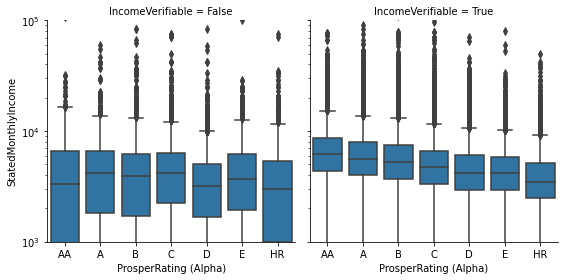

In [88]:
#in relation to Prosper Rating only
ll1 = sb.FacetGrid(data = df, col = 'IncomeVerifiable', size = 4)
ll1.map(sb.boxplot, 'ProsperRating (Alpha)', 'StatedMonthlyIncome')
plt.yscale("log")

#lets kick out the outlier smmhhh
plt.ylim(1e3, 1e5);

This graph shows that Stated Monthly Income when combine with the IncomeVerifiable. When Income is verified, it can give the team to guarantee that the bigger the Stated Monthly Income, then the bigger the possibility of that loan getting low risk grades. However when income is not verified, we cannot conlude and team may have another analysis to grade a loan. 

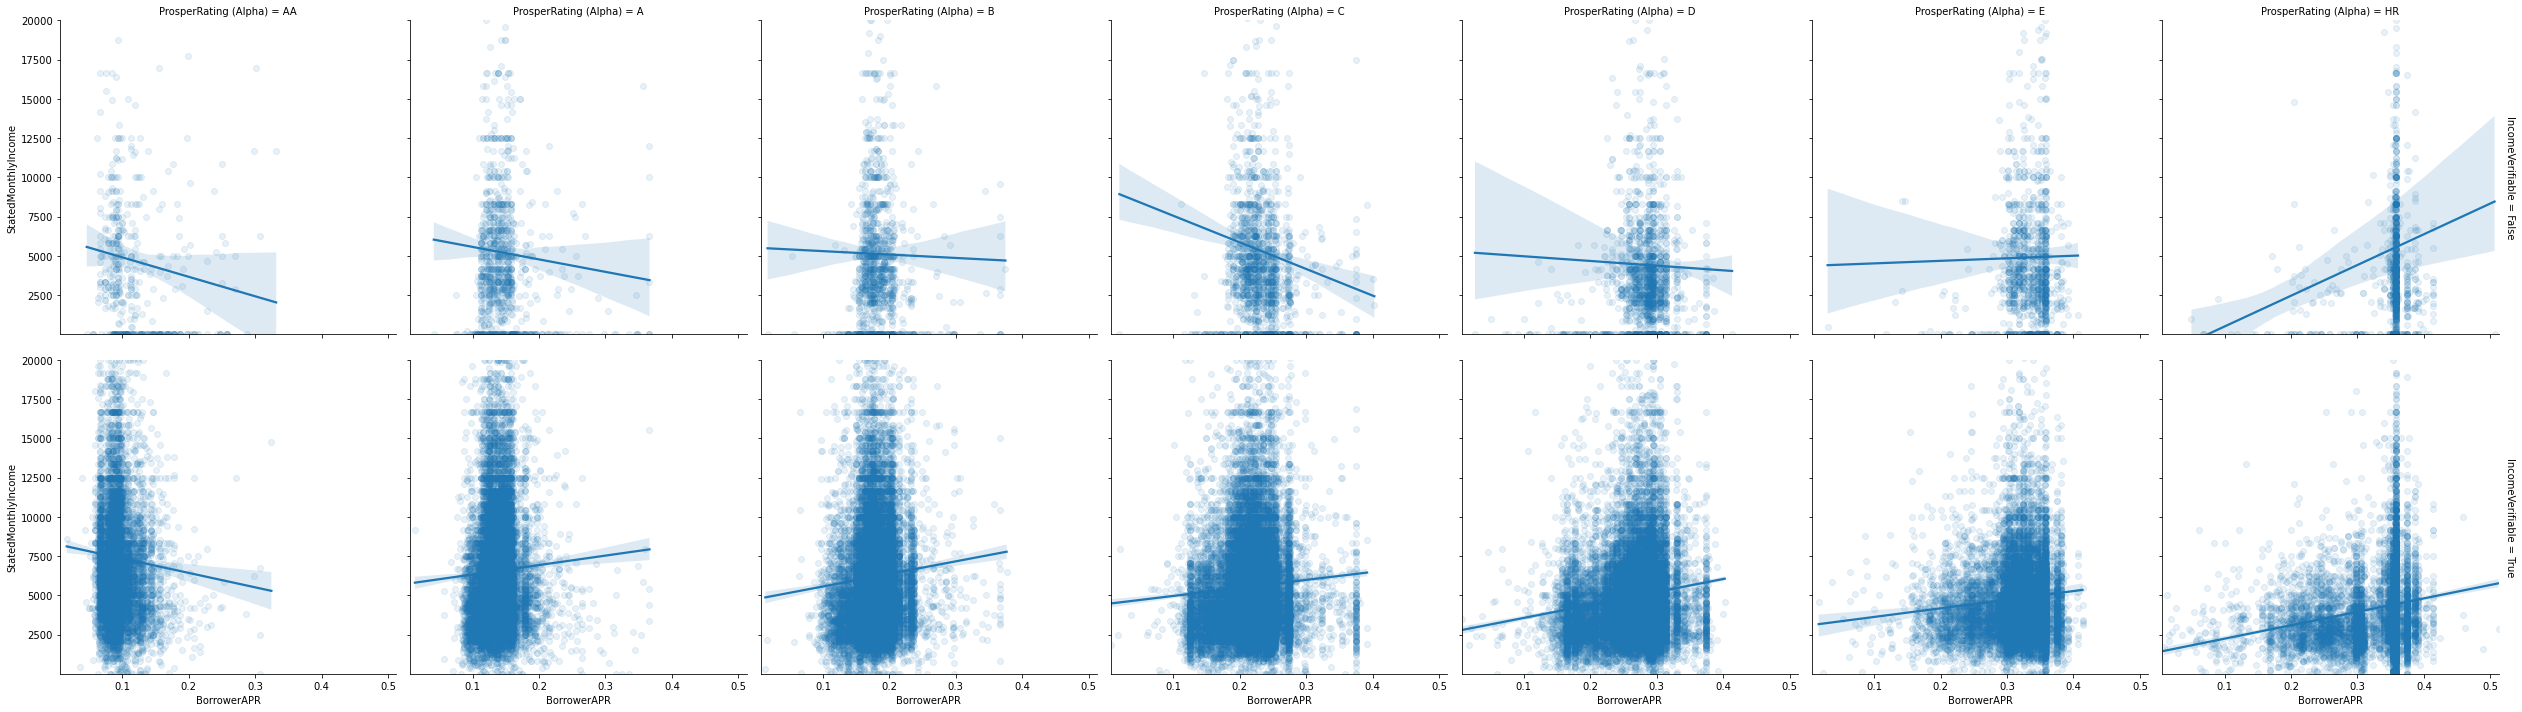

In [66]:
#impact to BorrowerAPR and ProsperRating altogether
ll2 =sb.FacetGrid(data=df,col='ProsperRating (Alpha)', row = 'IncomeVerifiable', height = 5, margin_titles = True)
ll2.map(sb.regplot,'BorrowerAPR','StatedMonthlyIncome',scatter_kws={'alpha': 0.1})
plt.ylim(1e-2, 2e4);

From above chart, we are not getting clear insight as the pattern is quite mixed. Although when the income is not verified, the regression line shows the negative line when the prosper rating is AA to D, but swifts to positive when its E and HR. 

Whereas if income is verified, the regression line shows positive trend when rating is B to HR, but shifts to negative when AA. 
So it is not clear here.


### Stated Monthly Income and IsBorrowerHomeowner


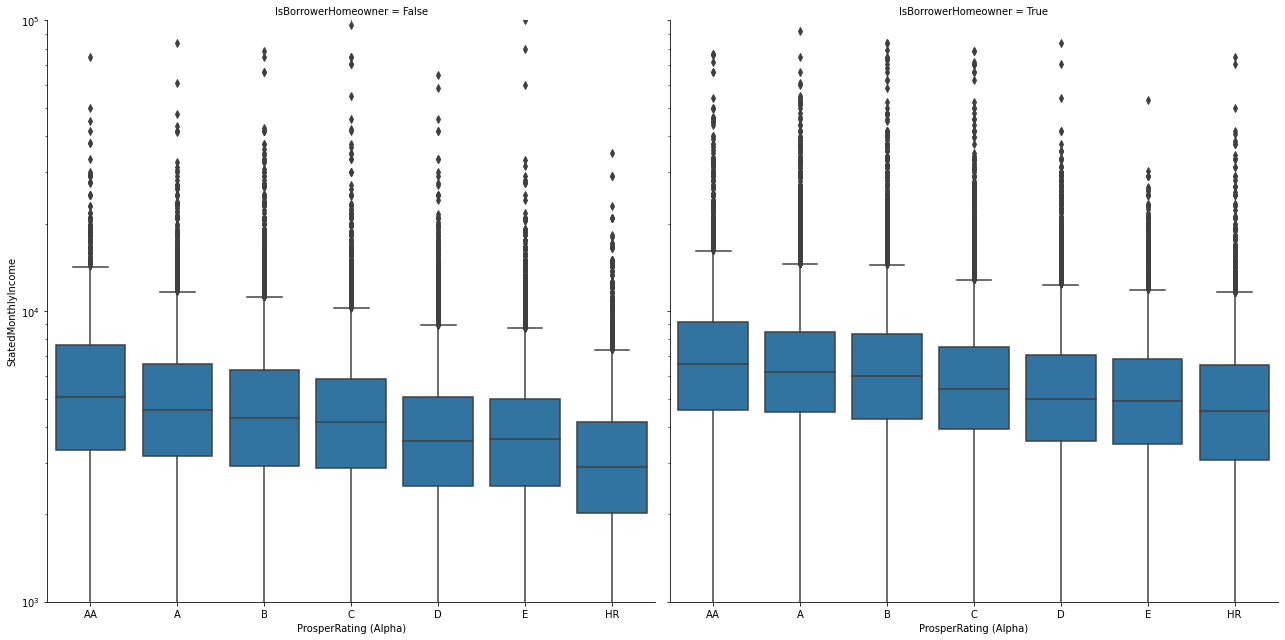

In [87]:
#in relation to Prosper Rating only
ll1 = sb.FacetGrid(data = df, col = 'IsBorrowerHomeowner', size = 9)
ll1.map(sb.boxplot, 'ProsperRating (Alpha)', 'StatedMonthlyIncome')
plt.yscale("log")

#lets kick out the outlier (again)
plt.ylim(1e3, 1e5);

OK! I think this is another good variables composition, the borrower status as home owners definitely has leveraged the consideration of getting a good credit Prosper rating. When a borrower is a homeowner, and with an increase in Monthly income, it will increase   the possibility of getting better Prosper Rating. We may see also for every Ratings, the average stated monthly income is higher when a borrower is a homeowner. It is suprising that if Stated Monthly Income acts as standalone comparison, it shows very little relation and almost no correlation with Borrower APR and Prosper Rating. 

### Plot matrices

In [68]:
#lets delete the rows for outliers, where monthly income is > 100,000 
df_copy = df

df_copy = df_copy[df['StatedMonthlyIncome'] <= 100000]


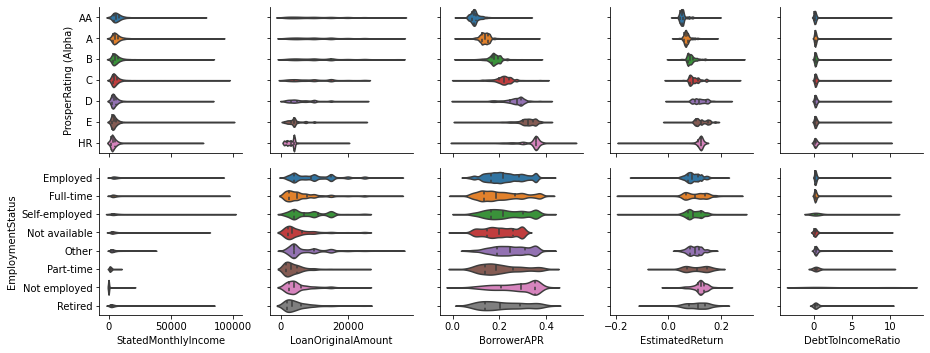

In [69]:
fig.set_size_inches(5, 5)
mm1 = sb.PairGrid(data = df_copy, x_vars = ['StatedMonthlyIncome', 'LoanOriginalAmount', 'BorrowerAPR', 'EstimatedReturn', 'DebtToIncomeRatio'],
                y_vars = ['ProsperRating (Alpha)','EmploymentStatus'])
mm1.map(sb.violinplot, inner = 'quartile', size = 10, aspect = 2 / 2)
sb.despine();

Actually above matrices doesnt give us any good, except the Prosper Rating and BorrowerAPR which was already covered in Bivariate visualization section